## Stok Optimizasyonu ve Sürdürülebilirlik Analizi

**Hedefler:**

* Stok seviyelerini optimize ederek israfı en aza indirmek.
* Satış, tedarik ve envanter verileri temelinde en verimli satın alma stratejilerini belirlemekle Ürün satış performansını değerlendirerek sürdürülebilir bir envanter yönetimi yaklaşımı oluşturmak.

**1. Veri Ön İşleme:**

* Tüm CSV dosyalarını birleşik bir ana veri setinde birleştirmek.
* Eksik veya hatalı veriler için tarama yapmak.
* Zaman serisi analizi için tarih formatlarını standart hale getirmek.

**2. Envanter Analizi:**

* Yılın başındaki ve sonundaki envanter durumunu, BegInvFINAL12312016.csv ve EndInvFINAL12312016.csv dosyalarını kullanarak değerlendirmek.
* Envanteri en yüksek ve en düşük olan ürünleri belirlemek.

**3. Satış Analizi:**

* SalesFINAL12312016.csv dosyasını inceleyerek en çok satan ve satışları yavaş olan ürünleri tespit etmek.
* Satış trendlerini, satış miktarı, satış fiyatı ve tarih gibi değişkenleri dikkate alarak analiz etmek.

**4. Satın Alma Analizi:**

* PurchasesFINAL12312016.csv ve InvoicePurchases12312016.csv dosyalarını kullanarak tedarik faaliyetlerini değerlendirmek.
* Farklı tedarikçilerden gelen satın alma hacimlerini, tedarik maliyetlerini ve tedarik zinciri süreçlerini incelemek.

**5. Optimal Stok Seviyesi Hesaplama:**

* Satış, tedarik ve envanter verilerini kullanarak her ürün için optimal stok seviyesini belirlemek.
* Ürünlerin satış hızı ve tedarik sürelerine göre stok seviyeleri önermek.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
purchase_prices = pd.read_csv("2017PurchasePricesDec.csv")  # # Tedarikçi Satın Alma Fiyatları
beg_inv = pd.read_csv("BegInvFINAL12312016.csv")  # # Başlangıç Envanteri
end_inv = pd.read_csv("EndInvFINAL12312016.csv")  # # Bitiş Envanteri
invoice_purchases = pd.read_csv("InvoicePurchases12312016.csv")  # # Satın Alma Faturaları
purchases = pd.read_csv("PurchasesFINAL12312016.csv")  # # Satın Alma Verisi
sales = pd.read_csv("SalesFINAL12312016.csv")  # # Satış Verisi


In [71]:
purchase_prices.head(1)

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD


In [72]:
beg_inv.head(1)

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01


In [73]:
end_inv.head(1)

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31


In [74]:
invoice_purchases.head(1)

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN


In [75]:
purchases.head(1)

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1


In [76]:
sales.head(1)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [77]:
# Tüm veri setlerimizin sütunlarına bakalım

print("purchase_prices Columns:")
print(purchase_prices.columns.tolist())

print("\nbeg_inv Columns:")
print(beg_inv.columns.tolist())

print("\nend_inv Columns:")
print(end_inv.columns.tolist())

print("\ninvoice_purchases Columns:")
print(invoice_purchases.columns.tolist())

print("\npurchases Columns:")
print(purchases.columns.tolist())

print("\nsales Columns:")
print(sales.columns.tolist())

purchase_prices Columns:
['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification', 'PurchasePrice', 'VendorNumber', 'VendorName']

beg_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'startDate']

end_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']

invoice_purchases Columns:
['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']

purchases Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']

sales Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']


### 1. VERİ ÖN İŞLEME

In [79]:
# Checking for missing data in each dataset
datasets = [purchase_prices, beg_inv, end_inv, invoice_purchases, purchases, sales]
dataset_names = ["purchase_prices", "beg_inv", "end_inv", "invoice_purchases", "purchases", "sales"]

for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]
    
    if not non_zero_missing_values.empty: # eğer zero_missing_values boş değilse 
        print(f"\n{name}deki eksik değerler:")
        print(non_zero_missing_values)

# zip(dataset_names, datasets): Python'un zip() fonksiyonu, iki listeyi (veya daha fazla listeyi) ele alır ve bunları sırasıyla eşleştirerek bir dizi tuple (demet)
    # oluşturur. Yani, dataset_names listesindeki her bir öğe, datasets listesindeki aynı konumdaki öğe ile eşleştirilir. Eğer listeler farklı uzunluktaysa, zip() 
    #fonksiyonu en kısa listeye kadar eşleştirme yapar. 
# empty() modülü ne işe yarar:
# Boş (empty): Eğer Series veya DataFrame hiç veri içermiyorsa (yani sıfır satır veya sütun varsa), empty özelliği True döner.
# Dolu: Eğer veri içeriyorsa, yani en az bir satır veya sütun varsa, empty özelliği False döner.
# Pandas'ta .empty özelliği, bir DataFrame veya Series'in boş olup olmadığını kontrol eder.
# Eğer non_zero_missing_values serisinde hiç eksik veri yoksa, yani tüm sütunlarda eksik değer sayısı 0 ise, .empty True döner.
# Eğer seride en az bir sütunda eksik veri varsa, .empty False döner.
# Eğer .empty True ise, not bunu False'a dönüştürür, böylece if bloğu çalışmaz. Bu durumda, eksik veri olmadığı için çıktı üretilmez.
# Eğer .empty False ise, not bunu True'ya dönüştürür ve if bloğu çalıştırılır. Yani, en az bir sütunda eksik veri olduğu için çıktı yazdırılır.


purchase_pricesdeki eksik değerler:
Description    1
Size           1
Volume         1
dtype: int64

end_invdeki eksik değerler:
City    1284
dtype: int64

invoice_purchasesdeki eksik değerler:
Approval    5169
dtype: int64

purchasesdeki eksik değerler:
Size    3
dtype: int64


* Eksik değerlerle başa çıkmak, veri analizindeki en kritik adımlardan biridir. Farklı veri segmentleri, farklı stratejiler gerektirebilir. Her bir veri setini ele alarak, en uygun çözüm yolunu belirleyelim:

**purchase_prices (Satın Alma Fiyatları):**

Boyut ve Hacim: Burada eksik girişler sınırlıdır. Seçeneklerimiz şunlar olabilir: Bu satırları kaldırmak ya da daha bilinçli bir yaklaşım olarak, bu boşlukları en yaygın görülen değerle (mod) doldurmak. Bu durumda, satırları kaldırmak en iyi seçenek olacaktır.

**end_inv (Dönem Sonu Stoku):**

Şehir: Eksik 'City' girişlerini en sık görülen şehirle (mod) doldurmak, başlangıç için mantıklı bir çözüm olabilir. Ancak, 'Store' sütununda yer bilgisi varsa, bunu daha bilinçli bir doldurma yöntemi olarak kullanabiliriz. Eğer bu da işe yaramazsa, 'Unknown' olarak işaretlemek en mantıklı seçenek olabilir. Biz 'Store' sütununu kullanmayı deneyeceğiz.

**invoice_purchases (Fatura Satın Alımları):**

Onay: Eğer 'Approval' sütununu ikili bir gösterge (örneğin, Onaylı/Onaylanmamış) olarak yorumluyorsak, eksik değerler bu faturaların durumunun henüz belirlenmediğini gösterebilir. Bunları 'Pending' (Beklemede) ya da 'Unknown' (Bilinmiyor) olarak kategorize edebiliriz.

**purchases (Satın Alma Verisi):**

Boyut: 'purchase_prices' sütununda yaptığımız gibi, bu birkaç satırı kaldırmak uygun olacaktır.




In [81]:
# purchase_prices veri kümesindeki eksik değerleri ele alma
cols_to_check = ['Description', 'Size', 'Volume']
# Belirtilen sütunlardaki eksik verileri kaldırıyoruz
for col in cols_to_check:
    purchase_prices = purchase_prices[purchase_prices[col].notna()] # sütundaki eksik (NaN) olmayan değerlerle satırları filtreler.

# end_inv veri kümesindeki eksik değerleri ele alma
if end_inv['Store'].nunique() == end_inv['City'].nunique(): # eşşiz değerler eşitse bu kod çalışacak
    # Eğer her mağaza için tek bir şehir varsa, mağaza-şehir eşlemesi yapıyoruz
    city_store_mapping = end_inv[['Store', 'City']].drop_duplicates().set_index('Store').to_dict()['City'] # drop_duplicates() Fonksiyonu: Herhangi bir tekrarı ortadan kaldırır.sadece city değerlerini alır
    end_inv['City'] = end_inv['City'].fillna(end_inv['Store'].map(city_store_mapping)) # burada City sütununu Store karsılıgı city_store_mapping ıcerısınde denk gelen sehırle doldurur
else:
    # Eğer eşleşme yoksa, eksik şehir bilgilerini "Bilinmiyor" olarak dolduruyoruz. Yani karsılıgınd bır store(mağaza yoksa onu bilinmiyor ile doldur)
    end_inv['City'].fillna('Bilinmiyor', inplace=True)

# invoice_purchases veri kümesindeki eksik değerleri ele alma
invoice_purchases['Approval'].fillna('Unknown', inplace=True)  # Eksik onay bilgilerini "Beklemede" ile dolduruyoruz

# purchases veri kümesindeki eksik değerleri ele alma
purchases = purchases[purchases['Size'].notna()]  # Eksik "Size" sütunlarını kaldırıyoruz

# Veri kümelerimizi bir listeye ekliyoruz
datasets = [purchase_prices, beg_inv, end_inv, invoice_purchases, purchases, sales]
dataset_names = ["purchase_prices", "beg_inv", "end_inv", "invoice_purchases", "purchases", "sales"]

# Her bir veri kümesindeki eksik değerleri kontrol ediyoruz
for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()  # Eksik değerlerin sayısını hesaplıyoruz
    non_zero_missing_values = missing_values[missing_values > 0]  # Sadece eksik olanları alıyoruz
    
    if not non_zero_missing_values.empty:  # Eğer eksik değerler varsa
        print(f"\n{name} veri kümesindeki eksik değerler:")
        print(non_zero_missing_values)  # Eksik değerleri yazdırıyoruz
    else:
        print(f"\n{name} veri kümesinde eksik değer bulunmamaktadır.")  # Eğer eksik değer yoksa



purchase_prices veri kümesinde eksik değer bulunmamaktadır.

beg_inv veri kümesinde eksik değer bulunmamaktadır.

end_inv veri kümesinde eksik değer bulunmamaktadır.

invoice_purchases veri kümesinde eksik değer bulunmamaktadır.

purchases veri kümesinde eksik değer bulunmamaktadır.

sales veri kümesinde eksik değer bulunmamaktadır.


## 2. Stok Analizi

In [34]:
# Brand — Marka
# Description — Açıklama
# onHand — Mevcutta Bulunan (Stokta Olan)


# "Marka ve Açıklamaya Göre Gruplama ve Yılın Başındaki Stokları Özetleme"
beg_summary = beg_inv.groupby(['Brand','Description'])['onHand'].sum().sort_values(ascending=False)

# "Marka ve Açıklamaya Göre Gruplama ve Yıl Sonundaki Stokları Özetleme"
end_summary = end_inv.groupby(['Brand','Description'])['onHand'].sum().sort_values(ascending=False)

# "Yılın Başında ve Sonunda En İyi 5 Ürünü Belirleme"
top_5_beg = beg_summary.head(5)
top_5_end = end_summary.head(5)

# "Yılın Başında ve Sonunda En Düşük Performans Gösteren 5 Ürünü Belirleme"
bottom_5_beg = beg_summary.tail(5)
bottom_5_end = end_summary.tail(5)

# Sonuçları Yazdırma
print("Yılın Başındaki En İyi 5 Ürün:\n", top_5_beg)
print("\nYıl Sonundaki En İyi 5 Ürün:\n", top_5_end)
print("\nYılın Başındaki En Düşük Performans Gösteren 5 Ürün:\n", bottom_5_beg)
print("\nYıl Sonundaki En Düşük Performans Gösteren 5 Ürün:\n", bottom_5_end)


Yılın Başındaki En İyi 5 Ürün:
 Brand  Description               
4261   Capt Morgan Spiced Rum        15499
8068   Absolut 80 Proof              15341
3876   Smirnoff 80 Proof             14829
3545   Ketel One Vodka               14499
6879   Maurice's Mentholated Mint    14180
Name: onHand, dtype: int64

Yıl Sonundaki En İyi 5 Ürün:
 Brand  Description            
3545   Ketel One Vodka            16770
4261   Capt Morgan Spiced Rum     16769
8111   Smirnoff 80 Proof          16242
8068   Absolut 80 Proof           15608
1233   Jack Daniels No 7 Black    15047
Name: onHand, dtype: int64

Yılın Başındaki En Düşük Performans Gösteren 5 Ürün:
 Brand  Description                 
42676  Kistler Chard Sonma Mountain    0
34693  Valley of the Moon Chard        0
42710  Pommery Pink Pop Rose           0
22647  Guillaume Vrignaud Chablis 1    0
21283  J Pierre Chablis Le Forneaux    0
Name: onHand, dtype: int64

Yıl Sonundaki En Düşük Performans Gösteren 5 Ürün:
 Brand  Description         

**En iyi ürünler:**

Toplam stok miktarı en yüksek olan ürünler, yani popüler ve talep gören ürünler. Bu ürünler genellikle yüksek satış gösterir.

**En kötü ürünler:**

Toplam stok miktarı en düşük olan ürünler, yani talep görmeyen veya yeterince satılmayan ürünler. Bu ürünler, genellikle az satan ve satışı zayıf olan ürünlerdir.


**En İyi Ürünler:**

"Ketel One Vodka", yıl sonunda en iyi ürün olarak öne çıktı, oysa yıl başında 4. sıradaydı. Bu, yıl içinde bu ürün için artan talep veya daha yüksek yeniden stoklama seviyeleri olabileceğini gösterebilir.

"Capt Morgan Spiced Rum", yıl başında en yüksek envantere sahip olmasına rağmen, yıl sonunda sadece bir birim farkla en iyi pozisyondan sıyrılamadı.

"Smirnoff 80 Proof", yıl boyunca marka numarasının 3876'dan 8111'e değiştiği görülüyor. Ancak buna rağmen popülaritesi tutarlı kaldı.

"Absolut 80 Proof", sadece bir sıralama kaybederek yıl sonuna kadar istikrarını korudu.

Yıl sonunda "Maurice’s Mentholated Mint" ürününü liste dışı bırakan ve yerine giren yeni bir ürün olan 

"Jack Daniels No 7 Black" top 5 listesine girdi.

**En Düşük Performans Gösteren Ürünler:**

Yılın başında ve sonunda sıfır envantere sahip ürünlerin olması dikkat çekici. Bu, bu ürünlerin ya yıl boyunca hiç stoğu olmadığı ya da tamamen satıldıkları ve bir daha stoklanmadıkları anlamına gelebilir.
Hem yıl başı hem de yıl sonu listelerindeki alt 5 ürün arasında önemli bir örtüşme olmaması, düşük stoklu ürünlerin yıl boyunca dalgalanabileceğini gösteriyor.
Alt sıralarda yer alan şaraplar ve niş ürünler, bu ürünlerin özel talepleri olan veya sınırlı arzı bulunan ürünler olabileceğini düşündürmektedir.


**Envanter Yönetimi Gözlemleri:**

En iyi ürünler arasında genel olarak yüksek tutarlılık, popüler ürünlerdeki talebin ve etkili envanter yenileme stratejilerinin bir göstergesi olarak dikkat çekiyor.
Ancak, bazı ürünlerde yıl başında ve sonunda sıfır envanter sayılarının tutarlı olması, envanter yönetimi veya tedarik zinciri ile ilgili potansiyel sorunlara işaret edebilir. Bu ürünlerin talebini gözden geçirmek ve bu ürünleri taşımaya devam etmenin iş açısından anlamlı olup olmadığını ya da stoklanmalarını engelleyen tedarik zinciri sorunları olup olmadığını değerlendirmek faydalı olabilir.


## 3.Satış Analizi

In [37]:
# SalesQuantity (Satış Miktarı.)
# En Çok Satan Ürünleri Bulma
best_selling_products = sales.groupby(['Brand','Description']).agg({'SalesQuantity':'sum'}).sort_values(by='SalesQuantity',ascending=False).head(10) # ascending=False büyükten küçüğe sıralanır.
print(f"En çok satan on ürün:\n{best_selling_products}\n")

# Yavaş Hareket Eden Ürünleri Bulma:
slow_moving_products = sales.groupby(['Brand','Description']).agg({'SalesQuantity':'sum'}).sort_values(by='SalesQuantity',ascending=True).head(10) # küçükten büyüğe sıralar
print(f"Yavaş hareket eden on ürün:\n{slow_moving_products}")


En çok satan on ürün:
                                    SalesQuantity
Brand Description                                
8111  Smirnoff 80 Proof                     28544
1892  Yukon Jack                            23121
4261  Capt Morgan Spiced Rum                20226
3606  Smirnoff Raspberry Vodka              19200
5111  Dr McGillicuddy's Mentholmnt          18411
3837  Skyy Vodka                            14057
4135  Smirnoff Blueberry Vodka              12477
4157  Smirnoff Green Apple Vodka            12102
3545  Ketel One Vodka                       11883
8068  Absolut 80 Proof                      11189

Yavaş hareket eden on ürün:
                                    SalesQuantity
Brand Description                                
25727 Chappellet Cab Svgn Pritchrd              1
23110 Duckhorn Estates Merlot                   1
2505  Bowmore Legend Single Malt                1
1043  Jim Beam Gift Pak                         1
23109 DeLille Cellars Chaleur Blnc              1

**En çok satan ürünler:** Bu ürünler yüksek satış miktarlarına sahip ve yüksek talep görüyor.

**Yavaş hareket eden ürünler:** Bu ürünler daha az satmış ve düşük talep görüyor.

Her iki analiz de satış stratejilerimizi belirlemenize yardımcı olabilir:

##### --- Zaman İçinde Satış Miktarlarının Görselleştirilmesi ---

<Axes: title={'center': 'Zaman İçindeki Satış Miktar'}, xlabel='SalesDate'>

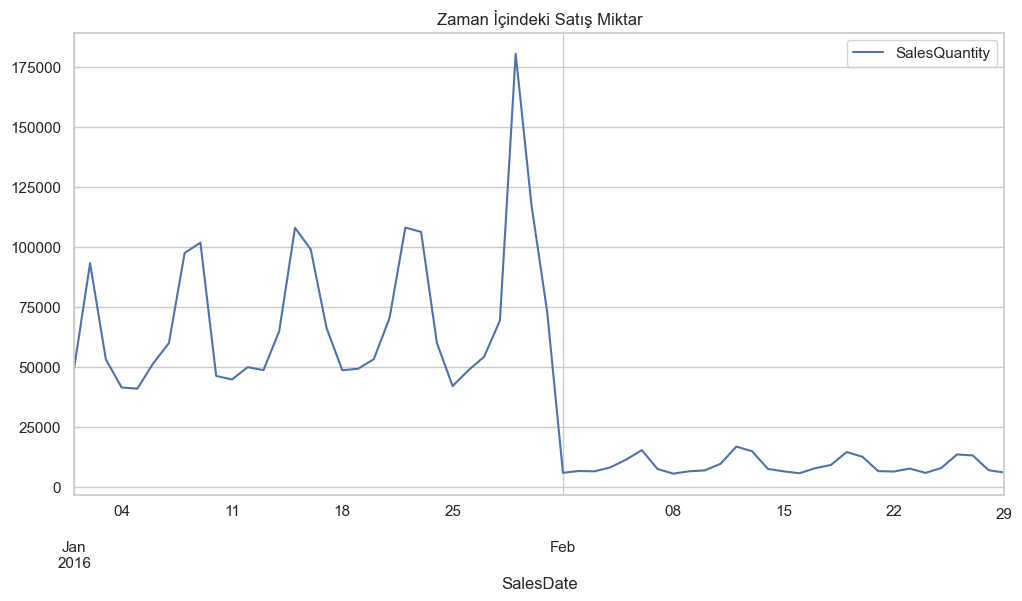

In [82]:
# SalesDate kolonundaki değerleri tarih formatına dönüştürüyoruz
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])

# 'SalesDate' kolonuna göre veriyi gruplandırarak her tarihteki toplam 'SalesQuantity' (satış miktarını) hesaplıyoruz
sales_quantity_trend = sales.groupby('SalesDate').agg({'SalesQuantity': 'sum'})

# Satış miktarlarının zaman içindeki trendini çiziyoruz
# figsize ile grafiğin boyutlarını belirliyoruz (12 genişlik, 6 yükseklik)
# title ile grafiğe başlık ekliyoruz
sales_quantity_trend.plot(figsize=(12, 6), title='Zaman İçindeki Satış Miktar')


##### --- Satış Tarihine Göre Ortalama Fiyat Trendi Hesaplama ve Görselleştirme ---


<Axes: title={'center': 'Zaman İçindeki Ortalama Satış Fiyatı'}, xlabel='SalesDate'>

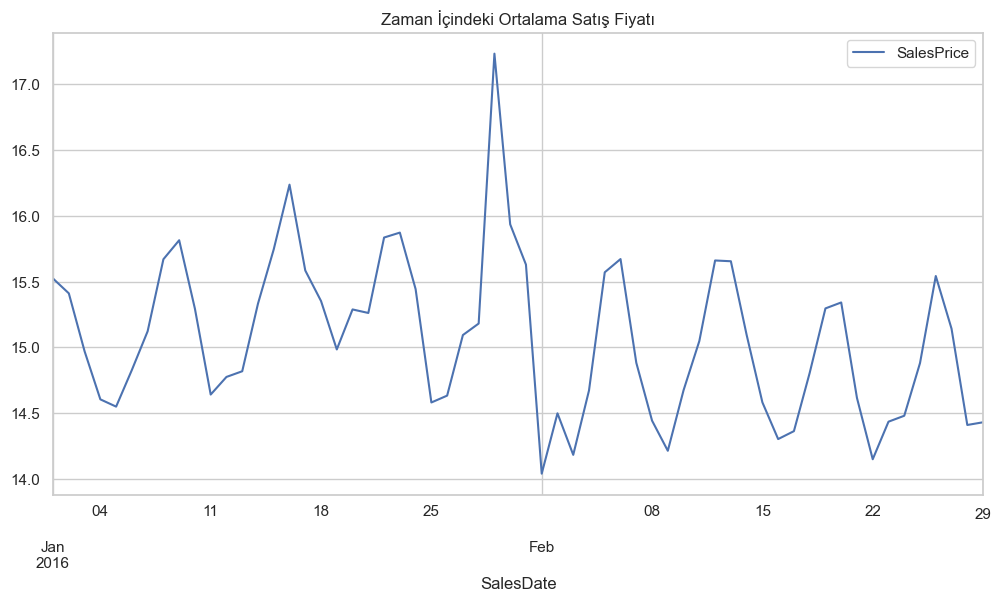

In [83]:
# Satış tarihine göre gruplayarak, her tarihteki ortalama satış fiyatını hesaplıyoruz
avg_price_trend = sales.groupby('SalesDate').agg({'SalesPrice': 'mean'})

# Hesaplanan ortalama satış fiyatlarını zaman içinde görselleştiriyoruz
avg_price_trend.plot(figsize=(12, 6), title='Zaman İçindeki Ortalama Satış Fiyatı')


* Satış miktarlarında döngüsel bir özellik gözlemleniyor, bu da haftalık desenler veya eğilimler olabileceğini gösteriyor. 

* 25 Ocak civarında belirgin bir zirve fark ediliyor; bu, özel etkinlikler, promosyonlar veya mevsimsel taleplerle ilişkili olabilir. Ancak, Şubat'a geçişle birlikte satışlarda belirgin bir düşüş gözlemleniyor, ardından ayın ilerleyen dönemlerinde satışların stabilize olduğu görülüyor.
* 
"Smirnoff 80 Proof" gibi içkiler, istikrarlı bir talep göstererek en çok satan ürünler arasında yer alıyor. Öte yandan, birkaç ürün yavaş hareket ediyor ve sınırlı satışlar gösteriyor. Bu ürünlerin marka ve tür açısından farklılık gösterdiği için, stoklamaya devam edilip edilmemesi konusunda stratejik bir inceleme yapılması gerekebilir.

## 4.Satın Alma Analizi

##### --- Tedarikçi Bazında Toplam Satın Alma Miktarı Hesaplama ve En Yüksek 10 Tedarikçinin Gösterilmesi ---



In [41]:
# 'VendorName' (Tedarikçi Adı) bazında gruplayarak, her tedarikçi için toplam 'Quantity' (Miktar) hesaplanır
vendor_purchase_volume = invoice_purchases.groupby('VendorName').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False)

# Tedarikçilere göre sıralanmış toplam satın alma miktarını yazdırıyoruz ve en yüksek 10 tedarikçiyi gösteriyoruz
print("En Yüksek Satın Alma Miktarına Sahip İlk 10 Tedarikçi:\n", vendor_purchase_volume.head(10))


En Yüksek Satın Alma Miktarına Sahip İlk 10 Tedarikçi:
                              Quantity
VendorName                           
DIAGEO NORTH AMERICA INC      5459788
JIM BEAM BRANDS COMPANY       2737165
MARTIGNETTI COMPANIES         2637275
CONSTELLATION BRANDS INC      2325892
E & J GALLO WINERY            1858260
PERNOD RICARD USA             1647558
BACARDI USA INC               1427075
SAZERAC CO INC                1417727
M S WALKER INC                1372841
ULTRA BEVERAGE COMPANY LLP    1077527


##### --- Tedarikçi Bazında Toplam Satın Alma Maliyeti Hesaplama ve En Yüksek 10 Tedarikçinin Gösterilmesi---

In [42]:
# 'VendorName' (Tedarikçi Adı) bazında gruplayarak, her tedarikçi için toplam 'PurchasePrice' (Satın Alma Fiyatı) hesaplanır
vendor_purchase_cost = purchases.groupby('VendorName').agg({'PurchasePrice': 'sum'}).sort_values(by='PurchasePrice', ascending=False)

# Tedarikçilere göre sıralanmış toplam satın alma maliyetini yazdırıyoruz ve en yüksek 10 tedarikçiyi gösteriyoruz
print("En Yüksek Satın Alma Maliyetine Sahip İlk 10 Tedarikçi:\n", vendor_purchase_cost.head(10))


En Yüksek Satın Alma Maliyetine Sahip İlk 10 Tedarikçi:
                              PurchasePrice
VendorName                                
DIAGEO NORTH AMERICA INC        3919293.52
JIM BEAM BRANDS COMPANY         2445075.37
PERNOD RICARD USA               2002210.70
MARTIGNETTI COMPANIES           1954748.37
ULTRA BEVERAGE COMPANY LLP      1328577.74
CONSTELLATION BRANDS INC        1316920.86
BACARDI USA INC                 1309369.34
E & J GALLO WINERY              1179960.50
BROWN-FORMAN CORP               1089218.08
M S WALKER INC                   979018.30


**Satın Alma Maliyetine Göre En İyi Tedarikçiler:**

* DIAGEO NORTH AMERICA INC en yüksek satın alma maliyetiyle dikkat çekiyor ve bu maliyet 3.919.293,52 Amerikan Doları olarak belirtiliyor.

* Takip eden iki tedarikçi, JIM BEAM BRANDS COMPANY ve PERNOD RICARD USA, sırasıyla 2.445.075,37 ve 2.002.210,70 Amerikan Doları'lık önemli satın alma maliyetlerine sahip.

* İlginç bir şekilde, ilk 10 tedarikçinin satın alma maliyetlerinde büyük farklar bulunuyor. DIAGEO NORTH AMERICA INC, ikinci sıradaki tedarikçiye göre neredeyse 1,5 milyon dolar farkla önde yer alıyor.
Bu analiz, tedarikçi seçiminde dikkat edilmesi gereken önemli maliyet farklarını ve hangi tedarikçilerin daha büyük satın alımlar yaptığını gösteriyor. Bu bilgi, bütçe planlaması, tedarikçi yönetimi ve stratejik kararlar için faydalı olabilir.

### Satın Alma Siparişi ve Alım Tarihleri Arasındaki Tedarik Süresini Hesaplama

In [43]:
# PODate ve ReceivingDate sütunlarını datetime formatına dönüştürme
purchases['PODate'] = pd.to_datetime(purchases['PODate'], errors='coerce')  # PODate(Satın Alma Siparişi Tarihi) sütununu datetime formatına çevir,e(rrors='coerce)' hata varsa 'NaT' (Not a Time) olarak kabul et
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'], errors='coerce')  # ReceivingDate(Alım Tarihi) sütununu datetime formatına çevir, hata varsa 'NaT' olarak kabul et

# Dönüştürme işleminden sonra herhangi bir eksik (NaT) değer olup olmadığını kontrol etme
if purchases['PODate'].isnull().any() or purchases['ReceivingDate'].isnull().any():
    print("Veri kümesinde geçersiz tarih girişleri bulunuyor. Lütfen veriyi gözden geçirin.")  # Eğer herhangi bir geçersiz tarih varsa uyarı ver
else:
    # PODate ve ReceivingDate arasındaki farkı hesaplayarak SupplyDuration (tedarik süresi) sütununu oluşturma
    purchases['SupplyDuration'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days  # Tedarik süresini gün cinsinden hesapla
    average_supply_duration = purchases['SupplyDuration'].mean()  # Ortalama tedarik süresini hesapla
    print("Ortalama Tedarik Süresi (gün cinsinden):", average_supply_duration)  # Ortalama tedarik süresini ekrana yazdır


Ortalama Tedarik Süresi (gün cinsinden): 7.620737197630656


**Tedarik ve Ödeme Süreleri:**

**Tedarik Süresi:** Ortalama olarak tedarik süresi 7,62 gündür. Bu, bir sipariş verildikten sonra ürünlerin alımının gerçekleşmesi için geçen sürenin oldukça hızlı olduğunu gösteriyor. Tedarik süresinin kısa olması, tedarik zincirinin verimli çalıştığını ve ürünlerin hızlı bir şekilde alındığını gösterir.

**Ödeme Süresi:** Ortalama ödeme süresi ise yaklaşık 35,66 gündür. Bu, ödeme için genellikle uzun vadeli kredi şartlarının belirlenmiş olabileceğini veya ödeme sürecinde gecikmelerin yaşanabileceğini ima eder. Yani, ürünler alındıktan sonra ödemenin yapılması daha uzun bir süre alıyor, bu da finansal süreçlerde bazı gecikmelere veya belirli ödeme koşullarına işaret edebilir.

* Özetle, tedarik süresi hızlı bir şekilde ürün temini sağlarken, ödeme süresi uzun olduğu için finansal yönetim ve ödeme koşulları üzerinde gözden geçirme yapılması gerekebilir.


##### --- Fatura ve Ödeme Tarihleri Arasındaki Ortalama Ödeme Süresinin Hesaplanması ---



In [52]:
purchases['InvoiceDate'] = pd.to_datetime(purchases['InvoiceDate'])
purchases['PayDate'] = pd.to_datetime(purchases['PayDate'])
purchases['PaymentDuration'] = (purchases['PayDate'] - purchases['InvoiceDate']).dt.days

average_payment_duration = purchases['PaymentDuration'].mean()
print("Ortalama ödeme süresi (gün cinsinden):", average_payment_duration)

Ortalama ödeme süresi (gün cinsinden): 35.658806366863914


### En Yüksek 10 Tedarikçi ve Toplam Satın Alma Fiyatları

In [44]:
# 'VendorName' (Tedarikçi Adı) ve 'PurchasePrice' (Satın Alma Fiyatı) sütunlarını seçiyoruz.
# Bu sayede sadece bu iki sütunla çalışacağız.
reduced_purchases = purchases[['VendorName', 'PurchasePrice']]

# 'VendorName' (Tedarikçi Adı) sütununa göre gruplama yapıyoruz
# ve her tedarikçi için toplam 'PurchasePrice' (Satın Alma Fiyatı) değerini hesaplıyoruz.
top_vendors = reduced_purchases.groupby('VendorName').sum()['PurchasePrice']

# En yüksek 10 satın alma fiyatına sahip tedarikçileri sıralıyoruz.
top_vendors = top_vendors.nlargest(10) # nlargest(n) fonksiyonu, bir pandas Series veya DataFrame üzerinde çalışır ve n sayıda en büyük değeri döndürür. Bu, genellikle sıralama ve filtreleme işlemleri için oldukça kullanışlıdır.

# En yüksek 10 satın alma maliyetine sahip tedarikçilerin isimlerini ve toplam satın alma fiyatlarını yazdırıyoruz.
print(top_vendors)


VendorName
DIAGEO NORTH AMERICA INC       3919293.52
JIM BEAM BRANDS COMPANY        2445075.37
PERNOD RICARD USA              2002210.70
MARTIGNETTI COMPANIES          1954748.37
ULTRA BEVERAGE COMPANY LLP     1328577.74
CONSTELLATION BRANDS INC       1316920.86
BACARDI USA INC                1309369.34
E & J GALLO WINERY             1179960.50
BROWN-FORMAN CORP              1089218.08
M S WALKER INC                  979018.30
Name: PurchasePrice, dtype: float64


### Top 10 Tedarikçi Satın Alma Maliyetlerinin Görselleştirilmesi: Bar ve Pasta Grafik

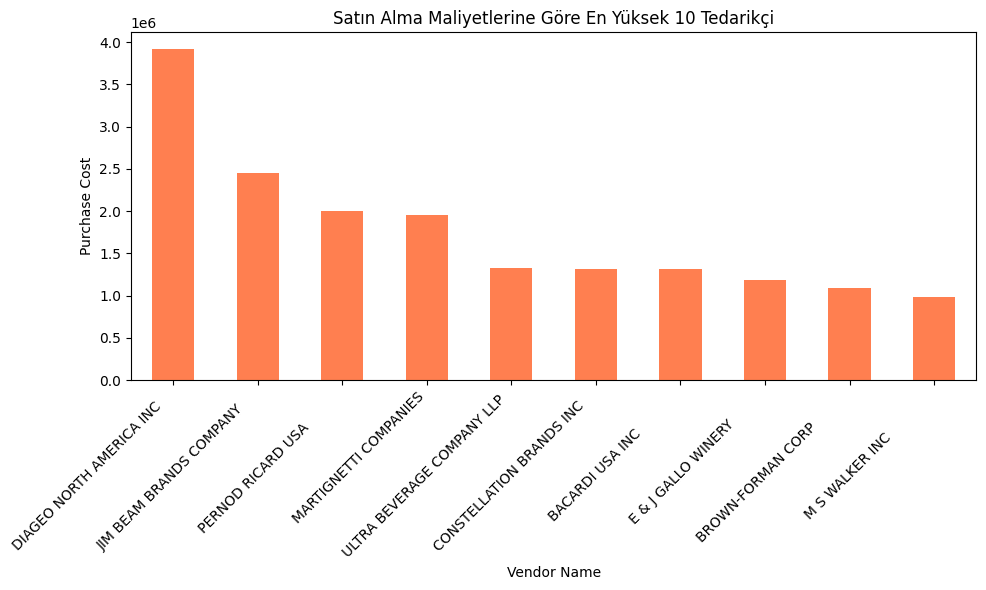

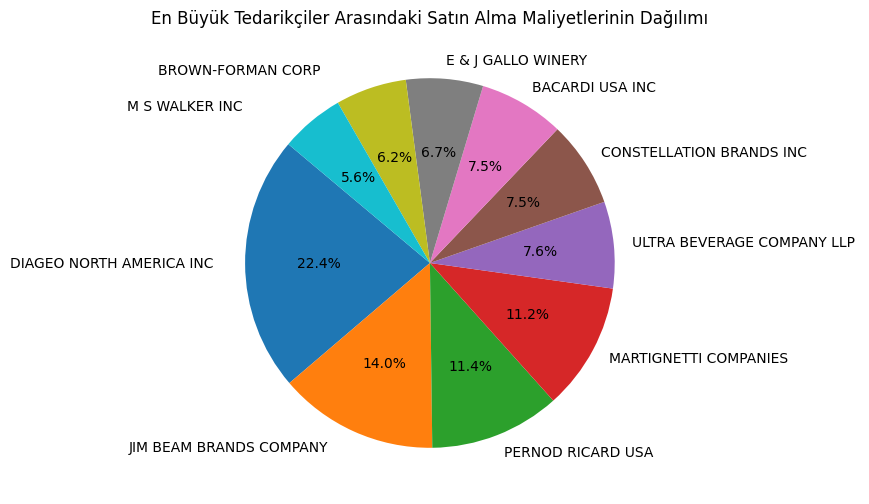

In [46]:
# Bar grafiği ile en yüksek satın alma maliyetine sahip ilk 10 tedarikçiyi görselleştirme
plt.figure(figsize=(10, 6))  # Grafik boyutlarını ayarlıyoruz (10 genişlik, 6 yükseklik)
top_vendors.plot(kind='bar', color='coral')  # 'bar' tipi grafik ile veriyi görselleştiriyoruz, 'coral' renk tonu kullanıyoruz
plt.title('Satın Alma Maliyetlerine Göre En Yüksek 10 Tedarikçi')  # Grafiğe başlık ekliyoruz
plt.ylabel('Purchase Cost')  # Y eksenine etiket ekliyoruz (Satın Alma Maliyeti)
plt.xlabel('Vendor Name')  # X eksenine etiket ekliyoruz (Tedarikçi Adı)
plt.xticks(rotation=45, ha='right')  # X eksenindeki etiketleri 45 derece döndürüyoruz ve sağa hizalıyoruz
plt.tight_layout()  # Grafik öğelerinin yerleşimini düzenliyoruz, böylece etiketler sıkışmaz
plt.show()  # Grafiği ekranda gösteriyoruz

# Pasta grafiği ile satın alma maliyetlerinin en yüksek 10 tedarikçiye dağılımını görselleştirme
plt.figure(figsize=(10, 6))  # Grafik boyutlarını ayarlıyoruz (10 genişlik, 6 yükseklik)
top_vendors.plot(kind='pie', autopct='%1.1f%%', startangle=140)  # 'pie' tipi grafik ile pasta grafiği oluşturuyoruz
plt.title('En Büyük Tedarikçiler Arasındaki Satın Alma Maliyetlerinin Dağılımı')  # Grafiğe başlık ekliyoruz
plt.ylabel('')  # Y eksenindeki varsayılan 'PurchasePrice' etiketini kaldırıyoruz
plt.show()  # Pasta grafiğini ekranda gösteriyoruz


* Bar grafiği, satın alma maliyetlerine göre en yüksek 10 tedarikçiyi göstermektedir. "DIAGEO NORTH AMERICA INC" tedarikçisi, diğerlerine kıyasla çok daha yüksek bir satın alma maliyetiyle açıkça öne çıkmaktadır. Diğer tedarikçiler, örneğin "JIM BEAM BRANDS COMPANY" ve "PERNOD RICARD USA", daha tutarlı bir dağılım sergileyerek aralarındaki harcamaların dengeli olduğunu göstermektedir.

* Pasta grafiğine geçtiğimizde, en yüksek tedarikçilerin satın alma maliyetlerinin dağılımını daha ayrıntılı bir şekilde görebiliyoruz. "DIAGEO NORTH AMERICA INC", en yüksek tedarikçiler arasında toplam satın alma maliyetlerinin %22,4'ünü oluşturmaktadır. Diğer tedarikçiler ise %5,6 ile %14 arasında değişen oranlarla, maliyetlerin daha dengeli bir şekilde dağıldığını göstermektedir.

* Sonuç olarak, satın alma maliyeti açısından baskın bir tedarikçi olsa da, en yüksek tedarikçiler arasındaki genel dağılım nispeten eşittir ve yalnızca birkaç istisna bulunmaktadır. Bu, çeşitlendirilmiş bir tedarikçi stratejisinin olduğunu, ancak birkaç tercih edilen ortaklıkların da mevcut olduğunu göstermektedir.

### Tedarik ve Ödeme Sürelerinin Dağılımları

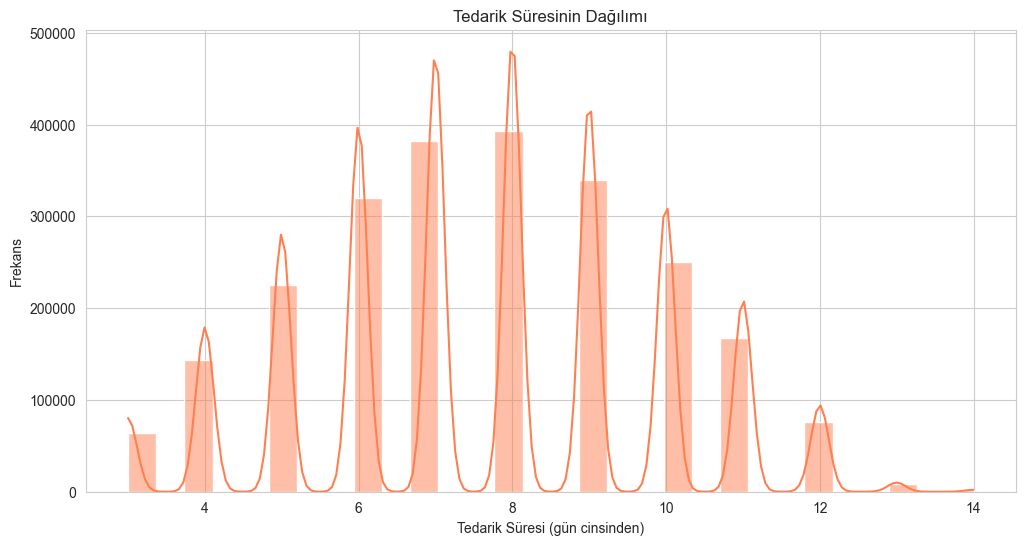

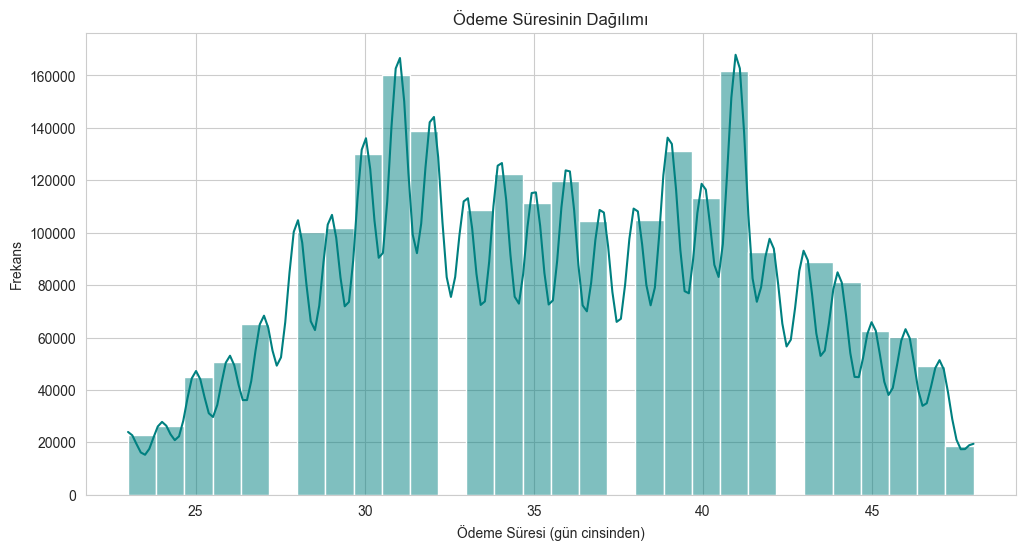

In [53]:
# Grafik stili ayarları
sns.set_style("whitegrid")  # Beyaz ızgaralı bir arka plan stili seçiliyor.

# Tedarik Süresi için Histogram
plt.figure(figsize=(12, 6))  # Grafik boyutlarını belirleme
sns.histplot(purchases['SupplyDuration'], kde=True, bins=30, color='coral')  # Tedarik süresi dağılımı için histogram çizimi
plt.title('Tedarik Süresinin Dağılımı')  # Grafik başlığı
plt.xlabel('Tedarik Süresi (gün cinsinden)')  # x-ekseni etiketi
plt.ylabel('Frekans')  # y-ekseni etiketi
plt.show()

# Ödeme Süresi için Histogram
plt.figure(figsize=(12, 6))  # Grafik boyutlarını belirleme
sns.histplot(purchases['PaymentDuration'], kde=True, bins=30, color='teal')  # Ödeme süresi dağılımı için histogram çizimi
plt.title('Ödeme Süresinin Dağılımı')  # Grafik başlığı
plt.xlabel('Ödeme Süresi (gün cinsinden)')  # x-ekseni etiketi
plt.ylabel('Frekans')  # y-ekseni etiketi
plt.show()



Tedarik süresi grafiklerinde gözlemlenen düzenli aralıklar, belirli tedarik döngülerinin veya yenileme programlarının takip ediliyor olabileceğini düşündürmektedir.
Tedarik dağılımındaki zirveler, özellikle 4, 6, 8, 10 ve 12 gün civarında, standart tedarik sözleşmesi sürelerini veya tercih edilen yeniden stoklama dönemlerini gösterebilir.
Ödeme sürelerindeki dalgalanma, özellikle 25 ile 45 gün arasındaki dönemlerde, ödeme şartlarındaki değişkenliği veya ödeme işlemlerindeki potansiyel tutarsızlıkları işaret ediyor olabilir.

##### --- Optimum Stok Seviyesi ve Güvenlik Stoku Hesaplama ---



In [54]:
# Satış tarihleri arasındaki en erken ve en geç tarihleri alıyoruz
start_date = sales['SalesDate'].min()  # En erken satış tarihi
end_date = sales['SalesDate'].max()  # En geç satış tarihi
total_days = (end_date - start_date).days  # Satış süresince geçen toplam gün sayısı

# Her bir ürün için Satış Hızı (Sales Velocity) hesaplanıyor
sales_velocity = sales.groupby(['Brand', 'Description']).agg(Total_Sales=('SalesQuantity', 'sum')).reset_index()  # Toplam satış miktarı
sales_velocity['Sales_Per_Day'] = sales_velocity['Total_Sales'] / total_days  # Günlük satış miktarı

# Tedarik süresi (Lead Time) hesaplanıyor
purchases.loc[:, 'Lead_Time'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days  # Alım ve teslimat tarihleri arasındaki fark
lead_times = purchases.groupby(['Brand', 'Description']).agg(Avg_Lead_Time=('Lead_Time', 'mean')).reset_index()  # Ortalama tedarik süresi

# Satış hızı ve tedarik sürelerini birleştiriyoruz
merged_data = pd.merge(sales_velocity, lead_times, on=['Brand', 'Description'], how='left')  # İki veri setini birleştiriyoruz

# Optimum stok seviyesini hesaplıyoruz
merged_data['Optimal_Stock_Level'] = merged_data['Sales_Per_Day'] * merged_data['Avg_Lead_Time']  # Günlük satış hızı ve ortalama tedarik süresi çarpımı

# Güvenlik stok seviyesini hesaplıyoruz, her ürün için maksimum satışları kullanarak
max_sales = sales.groupby(['Brand', 'Description']).agg(Max_Daily_Sales=('SalesQuantity', 'max')).reset_index()  # Maksimum günlük satış miktarı
merged_data = pd.merge(merged_data, max_sales, on=['Brand', 'Description'], how='left')  # Maksimum satışları veri setine ekliyoruz

# Güvenlik stok miktarını hesaplıyoruz
merged_data['Safety_Stock'] = merged_data['Max_Daily_Sales'] - merged_data['Sales_Per_Day']  # Maksimum satıştan günlük satış hızı çıkarılır
merged_data['Recommended_Stock_Level'] = merged_data['Optimal_Stock_Level'] + merged_data['Safety_Stock']  # Optimum stok seviyesi ve güvenlik stoku toplamı


##### --- Günlük Satış Miktarının Maksimum Günlük Satış Miktarından Büyük Olduğu Ürünlerin Belirlenmesi ---

In [56]:
# Günlük satış miktarı (Sales_Per_Day) değeri, maksimum günlük satış miktarından (Max_Daily_Sales) büyük olan ürünleri filtreliyoruz
problematic_products = merged_data[merged_data['Sales_Per_Day'] > merged_data['Max_Daily_Sales']]  # Problematik ürünler

# Problematik ürünlerin sayısını alıyoruz
num_problematic_products = len(problematic_products)  # Problematik ürün sayısı

# Problematik ürünleri ekrana yazdırıyoruz
print(f"Günlük Satış Miktarı (Sales_Per_Day) değeri, Maksimum Günlük Satış Miktarı (Max_Daily_Sales) değerinden büyük olan {num_problematic_products} ürün bulunmaktadır.")
if num_problematic_products > 0:
    print('*********************************************************************************')
    print(problematic_products[['Brand', 'Description', 'Sales_Per_Day', 'Max_Daily_Sales']])  # Problematik ürünlerin detaylarını yazdırıyoruz


Günlük Satış Miktarı (Sales_Per_Day) değeri, Maksimum Günlük Satış Miktarı (Max_Daily_Sales) değerinden büyük olan 555 ürün bulunmaktadır.
*********************************************************************************
      Brand                   Description  Sales_Per_Day  Max_Daily_Sales
7        77   Three Olives Espresso Vodka      15.389831                8
8        79      Three Olives Loopy Vodka       7.050847                5
76      273      Sauza Extra Gold Tequila      10.372881                9
139     482              Absolut 80 Proof      37.135593               23
142     497        Capt Morgan Spiced Rum      39.644068               38
...     ...                           ...            ...              ...
7426  44712    Sonoma-Cutrer Chard Sonoma      27.610169               25
7580  46379  Ghost Pine Cab Svgn LMartini      14.474576               12
7590  46447         Gascon Malbec Mendoza      22.796610               16
7592  46458      Layer Cake Barosa Shir

##### --- Problematik Ürünlerin Maksimum Günlük Satış Değerini Güncelleme ve Stok Seviyelerinin Yeniden Hesaplanması ---

In [57]:
# Problematik ürünler için Maksimum Günlük Satış Miktarını (Max_Daily_Sales) Güncelliyoruz
merged_data.loc[merged_data['Sales_Per_Day'] > merged_data['Max_Daily_Sales'], 'Max_Daily_Sales'] = merged_data['Sales_Per_Day']  # Eğer günlük satış, maksimum satıştan büyükse, max satış değerini güncelliyoruz

# Maksimum Günlük Satış Miktarını (Max_Daily_Sales) güncelledikten sonra, Güvenlik Stokunu ve Önerilen Stok Seviyesini yeniden hesaplıyoruz
merged_data['Safety_Stock'] = merged_data['Max_Daily_Sales'] - merged_data['Sales_Per_Day']  # Güvenlik stoğunu, max satıştan günlük satış çıkarılarak hesaplıyoruz
merged_data['Recommended_Stock_Level'] = merged_data['Optimal_Stock_Level'] + merged_data['Safety_Stock']  # Önerilen stok seviyesi, optimum stok seviyesi ve güvenlik stok seviyesinin toplamı olarak hesaplanır


C:\Users\Özkan\AppData\Local\Temp\ipykernel_8800\1946032236.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 15.38983051   7.05084746  10.37288136  37.13559322  39.6440678
  14.           4.28813559  13.74576271  30.3220339   19.93220339
   7.50847458  25.01694915  10.01694915   7.27118644  13.98305085
  45.08474576  17.22033898  38.27118644  81.45762712 162.33898305
  30.3220339   15.88135593  33.79661017  17.72881356  29.72881356
   5.3559322    6.55932203  87.93220339  19.57627119 124.77966102
  34.15254237  21.69491525  29.55932203  52.91525424  29.57627119
  10.13559322  15.74576271  21.69491525  12.52542373  14.96610169
  23.30508475  16.52542373  17.05084746  18.69491525  11.08474576
   7.40677966  26.25423729   6.72881356  27.93220339   4.3559322
   6.38983051  33.59322034  45.13559322 391.88135593  23.52542373
  21.52542373  39.11864407   3.27118644   5.22033898   2.42372881
  30.42372881   5.01694915

Bir envanter yönetimi bağlamında, Sales_Per_Day (Günlük Satış Miktarı), bir ürünün günlük olarak satılan ortalama birim sayısını temsil ederken, Max_Daily_Sales (Maksimum Günlük Satış), belirli bir ürün için tek bir günde satılan en yüksek birim sayısını ifade eder. Mantıksal olarak, Max_Daily_Sales, Sales_Per_Day'den asla daha düşük olmamalıdır, çünkü bu, ortalama günlük satışların bir gün içinde kaydedilen en yüksek satıştan daha yüksek olduğu anlamına gelir ki bu çelişkili bir durumdur.

Bu tür bir durumun meydana gelmesi, çeşitli nedenlerden kaynaklanabilir, bunlar arasında veri giriş hataları, uç değerler veya hesaplama hataları yer alabilir. Verisetimizde, bu tutarsızlığa sahip 555 ürün olduğunu gözlemledik.

Bu durumu düzeltmek için, bu problemli ürünlerin Max_Daily_Sales değerini Sales_Per_Day değeriyle eşitleyerek güncelledik. Bu, Max_Daily_Sales'in, ortalama günlük satışlardan en azından büyük veya eşit olmasını sağlar ve böylece verisetinde mantıksal tutarlılığın korunmasına yardımcı olur.

##### --- En Yüksek Önerilen Stok Seviyelerine Sahip Ürünlerin Görselleştirilmesi ---

C:\Users\Özkan\AppData\Local\Temp\ipykernel_8800\3447424926.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recommended_Stock_Level', y='Description', data=sorted_data.head(20), palette='viridis')  # En yüksek 20 ürünü gösteriyoruz


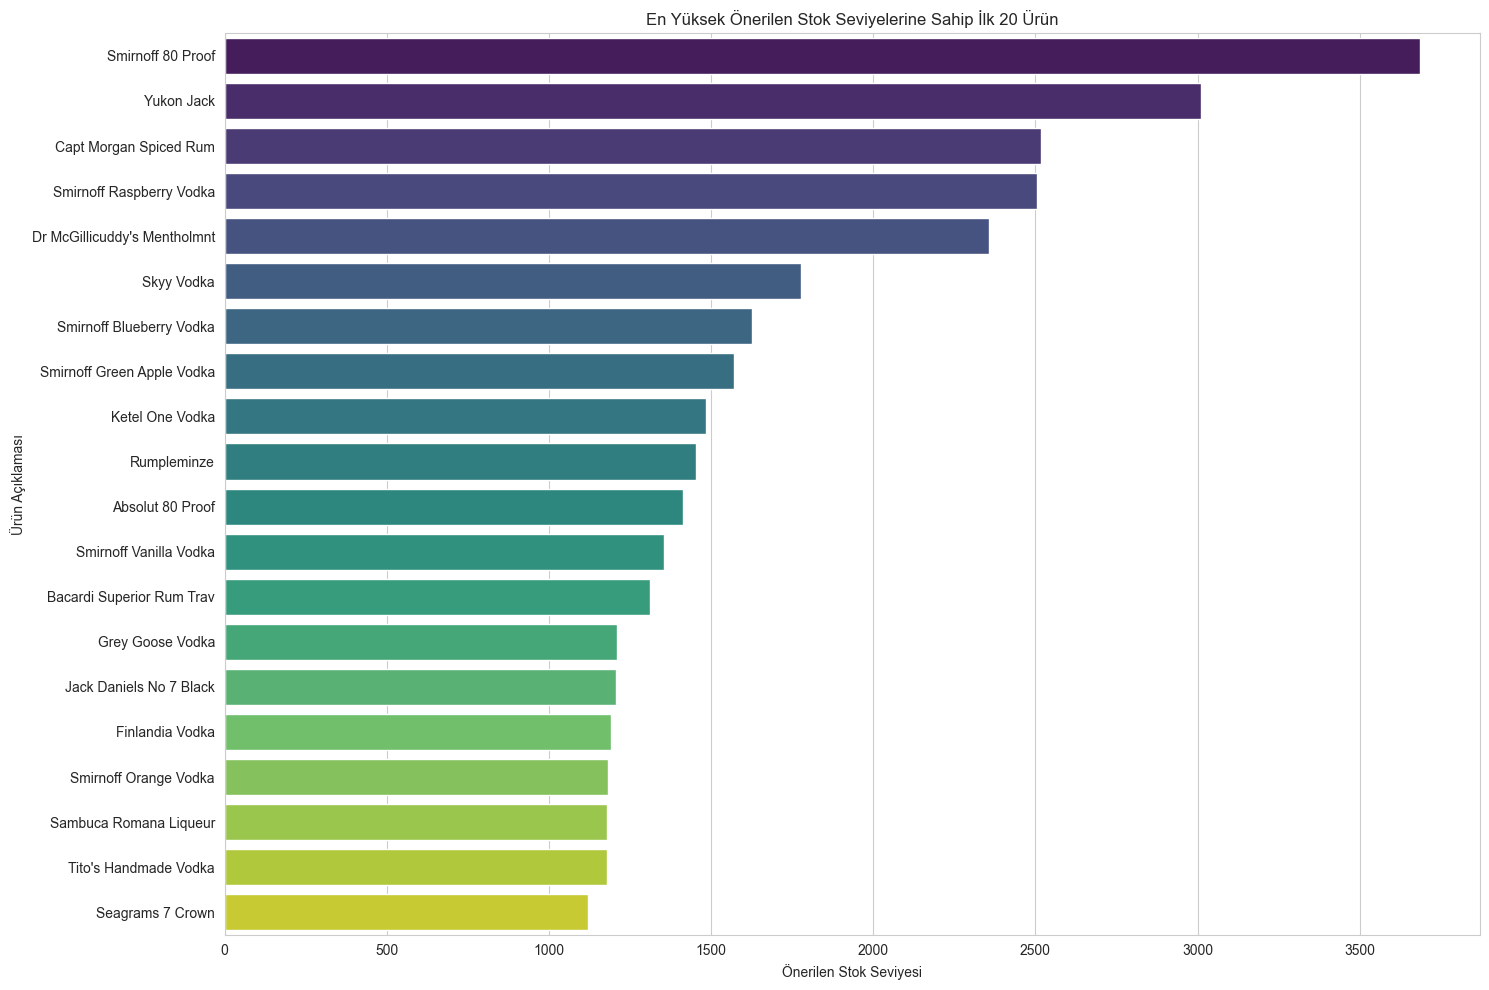

In [58]:
# Veriyi, daha iyi görselleştirme için Recommended_Stock_Level'e göre sıralıyoruz
sorted_data = merged_data.sort_values(by='Recommended_Stock_Level', ascending=False)  # Önerilen Stok Seviyesini büyükten küçüğe sıralıyoruz

# Görselleştirme
plt.figure(figsize=(15, 10))  # Grafik boyutunu ayarlıyoruz
sns.barplot(x='Recommended_Stock_Level', y='Description', data=sorted_data.head(20), palette='viridis')  # En yüksek 20 ürünü gösteriyoruz
plt.xlabel('Önerilen Stok Seviyesi')  # x ekseni etiketini Türkçe olarak ayarlıyoruz
plt.ylabel('Ürün Açıklaması')  # y ekseni etiketini Türkçe olarak ayarlıyoruz
plt.title('En Yüksek Önerilen Stok Seviyelerine Sahip İlk 20 Ürün')  # Başlık Türkçe olarak ayarlanıyor
plt.tight_layout()  # Grafik öğelerinin düzenini iyileştiriyoruz
plt.show()  # Grafiği gösteriyoruz


Bar grafiği, en yüksek 20 ürün için önerilen stok seviyelerini görsel olarak temsil etmektedir. "Smirnoff 80 Proof", en yüksek önerilen stok seviyesine sahip ürün olarak öne çıkmaktadır, bu da yüksek satış hızı ve/veya daha uzun tedarik sürelerine sahip olduğunu göstermektedir. Tersine, grafiğin alt kısmında yer alan "Sambuca Romana Liqueur" gibi ürünlerin önerilen stok seviyeleri daha düşük olmuştur. Bu görselleştirme, envanterin yeniden doldurulması ve tahsis edilmesi konusunda hızlı kararlar alınmasına yardımcı olmaktadır.








##### --- Safety Stock Dağılımının Görselleştirilmesi ---

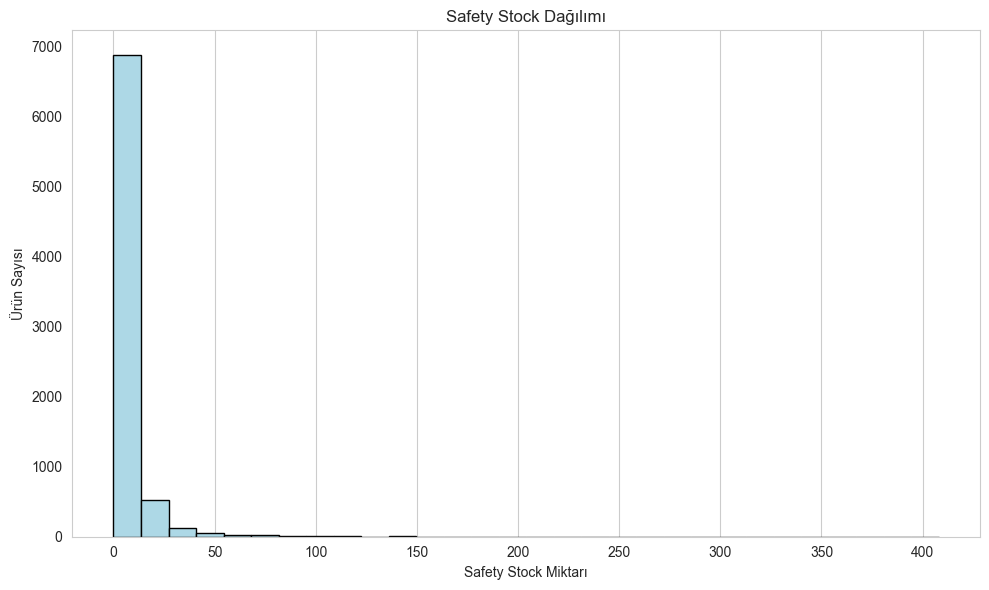

In [59]:
# Safety Stock dağılımı için histogramı çiziyoruz
plt.figure(figsize=(10,6))  # Grafik boyutunu ayarlıyoruz
plt.hist(merged_data['Safety_Stock'], bins=30, color='lightblue', edgecolor='black')  # 30 kutucuk ile histogramı çiziyoruz, renk ve kenarlık ekliyoruz
plt.title('Safety Stock Dağılımı')  # Başlık Türkçe olarak belirleniyor
plt.xlabel('Safety Stock Miktarı')  # x ekseni etiketini Türkçe olarak ayarlıyoruz
plt.ylabel('Ürün Sayısı')  # y ekseni etiketini Türkçe olarak ayarlıyoruz
plt.grid(axis='y')  # Y eksenine göre ızgara ekliyoruz
plt.tight_layout()  # Grafik öğelerinin düzenini iyileştiriyoruz
plt.show()  # Grafiği gösteriyoruz


Histogram, ürünler arasındaki güvenlik stoğu miktarlarının dağılımını gösteriyor. En dikkat çeken nokta, ürünlerin çoğunun güvenlik stoğu miktarlarının sıfır civarında yoğunlaşmış olmasıdır. Bu, birçok ürün için ya hiç güvenlik stoğu bulunmadığını ya da çok minimal bir güvenlik stoğu olduğunu gösteriyor.

##### --- Ortalama Tedarik Süresi Dağılımı ---

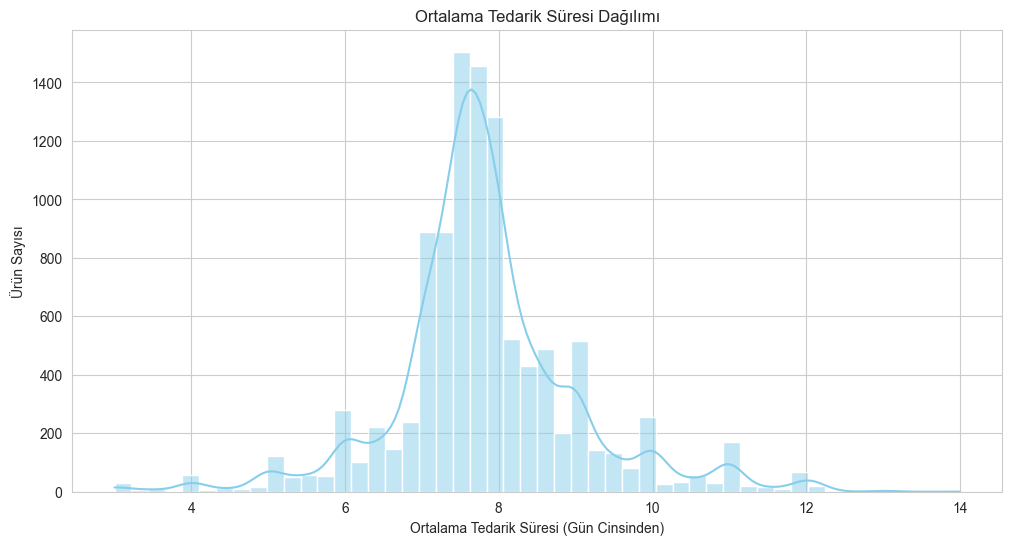

In [60]:
# Grafik stilini ayarlıyoruz
sns.set_style("whitegrid")  # Beyaz ızgara stilini seçiyoruz

# Histogramı oluşturuyoruz
plt.figure(figsize=(12, 6))  # Grafik boyutunu ayarlıyoruz
sns.histplot(data=lead_times, x='Avg_Lead_Time', bins=50, color='skyblue', kde=True)  # 50 kutucuk ile histogram, mavi renk, ve KDE (Kernel Density Estimation) eğrisini ekliyoruz
plt.title('Ortalama Tedarik Süresi Dağılımı')  # Başlık Türkçe olarak belirleniyor
plt.xlabel('Ortalama Tedarik Süresi (Gün Cinsinden)')  # x ekseni etiketini Türkçe olarak ayarlıyoruz
plt.ylabel('Ürün Sayısı')  # y ekseni etiketini Türkçe olarak ayarlıyoruz
plt.show()  # Grafiği gösteriyoruz


Histogram, ürünler için ortalama tedarik sürelerinin dağılımını göstermektedir. 8 gün civarındaki zirve, çoğu ürünün ortalama tedarik süresinin yaklaşık 8 gün olduğunu göstermektedir. Ayrıca, 4 ila 14 gün arasında daha kısa veya daha uzun tedarik sürelerine sahip bazı ürünler de bulunmaktadır. Grafik üzerindeki düzgün çizgi (Kernel Density Estimation), dağılımın şeklini daha net bir şekilde göstererek, 8 gün etrafındaki yoğunlaşmayı doğrulamaktadır.





##### --- En Yüksek Günlük Satış Hızına Sahip Ürünler ---

C:\Users\Özkan\AppData\Local\Temp\ipykernel_8800\3861374288.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Description', y='Sales_Per_Day', data=top_products, palette='viridis')


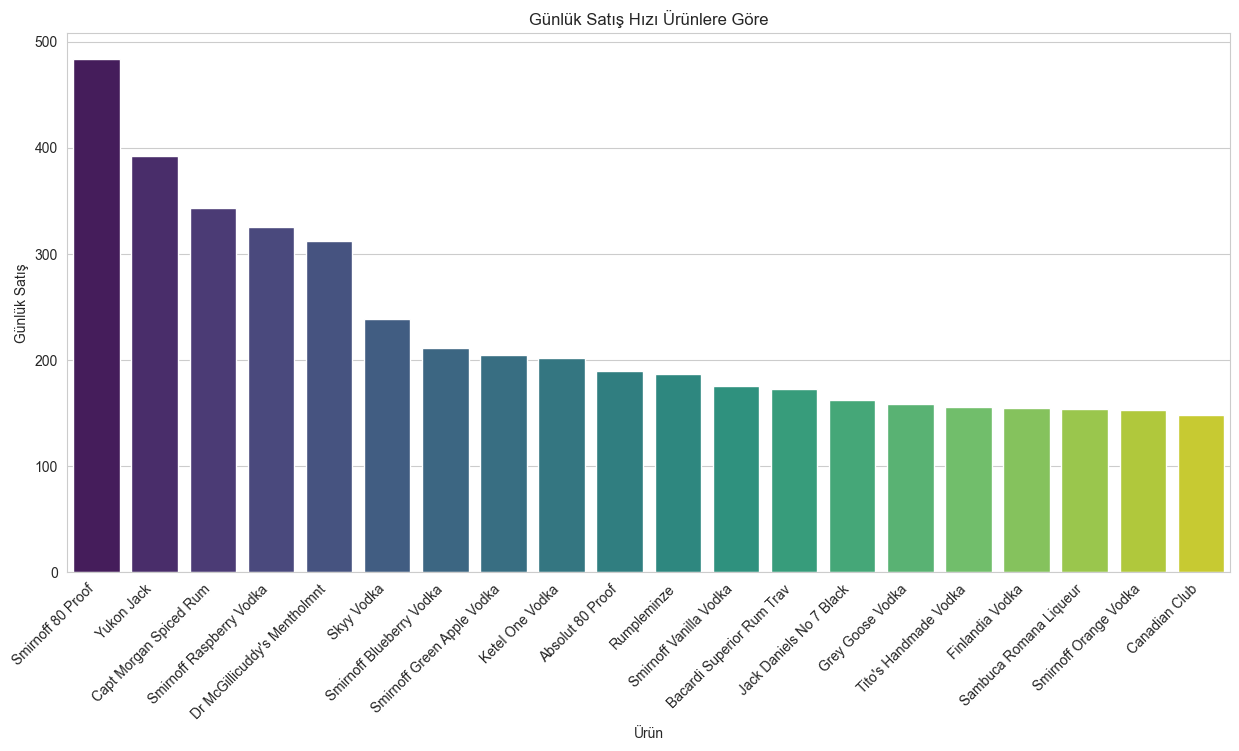

In [61]:
# Veriyi 'Sales_Per_Day' (Günlük Satış) değerine göre azalan sırayla sıralayarak en iyi ürünleri alıyoruz
top_products = sales_velocity.sort_values(by='Sales_Per_Day', ascending=False).head(20)  # Burada gösterilecek ürün sayısını ihtiyaçlarınıza göre ayarlayabilirsiniz

# Bar grafik oluşturuluyor
plt.figure(figsize=(15, 7))
sns.barplot(x='Description', y='Sales_Per_Day', data=top_products, palette='viridis')

# X eksenindeki etiketlerin 45 derece döndürülmesi ve hizalanması
plt.xticks(rotation=45, ha='right')

# Grafik başlığı ve eksen etiketleri ekleniyor
plt.title('Günlük Satış Hızı Ürünlere Göre')
plt.xlabel('Ürün')
plt.ylabel('Günlük Satış')

# Grafik gösteriliyor
plt.show()


Bu bar grafik, çeşitli ürünlerin günlük satış hızını göstermektedir. İlk bakışta, "Smirnoff 80 Proof" ürününün en yüksek günlük satış hızına sahip olduğu ve diğer ürünlere göre önemli ölçüde önde olduğu açıkça görülmektedir. Grafikte sağa doğru ilerledikçe, her bir ürünün günlük satışları azalmakta ve bu, popülerlik veya talep sıralamasının azaldığını göstermektedir. Koyu renkten açık renge doğru giden renk tonları da satış hızındaki bu azalma trendini vurgulamaktadır. Bu grafik, envanter yönetimi için değerli bilgiler sunmakta, işletmelerin hangi ürünleri daha sık stoklaması gerektiğine dair satış hızlarına dayalı öncelikler belirlemelerine yardımcı olmaktadır.

### 5. Optimal Stok Seviyesi Hesaplaması

##### --- Mevcut Stok Seviyeleri ve Sipariş Miktarlarının Hesaplanması ve Görselleştirilmesi ---

      Brand                   Description  Current_Stock  \
0        58   Gekkeikan Black & Gold Sake          385.0   
1        60        Canadian Club 1858 VAP          146.0   
2        61         Margaritaville Silver           12.0   
3        62      Herradura Silver Tequila          459.0   
4        63    Herradura Reposado Tequila          442.0   
...     ...                           ...            ...   
7653  90084  Les Fiefs Lagrange St Jul 11            2.0   
7654  90085  Ch Lilian 09 Ladouys St Este            6.0   
7655  90086  La Dame Montrose St Estep 11           32.0   
7656  90087  Ch Mouton Rothschild 12 Paui           45.0   
7657  90089    Ch Lynch Bages 12 Pauillac          124.0   

      Recommended_Stock_Level  Order_Quantity  
0                   39.990104        0.000000  
1                   16.996855        0.000000  
2                   14.894394        2.894394  
3                   20.384988        0.000000  
4                   18.042373        0.

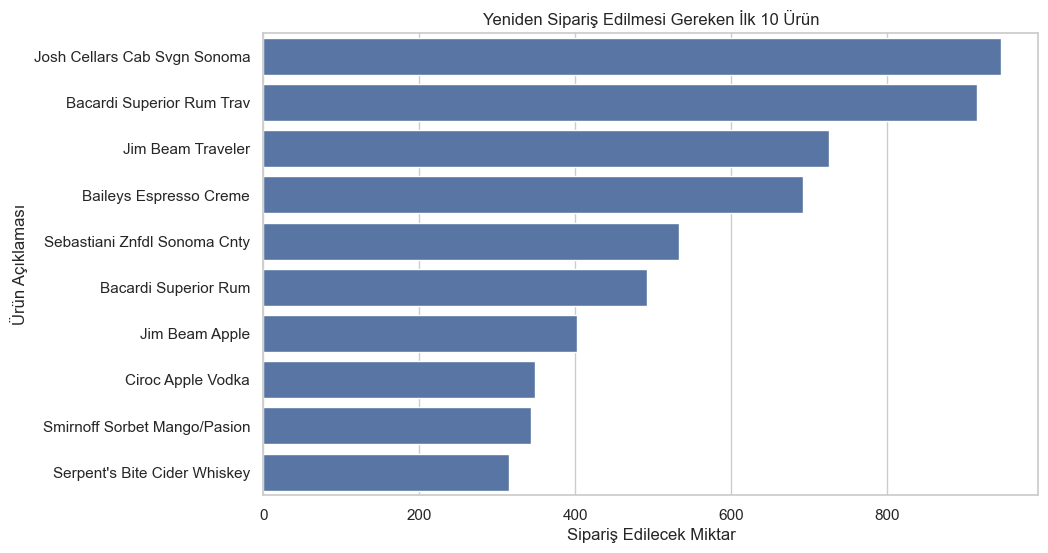

In [62]:
# endDate sütununu datetime formatına dönüştürme
end_inv['endDate'] = pd.to_datetime(end_inv['endDate'])

# Son envanter tarihini alıyoruz
latest_inventory_date = end_inv['endDate'].max()

# Son envanter tarihiyle filtreleme yapıyoruz
current_inventory = end_inv[end_inv['endDate'] == latest_inventory_date]

# Ürün bazında mevcut stok seviyelerini özetliyoruz
current_stock_levels = current_inventory.groupby(['Brand', 'Description']).agg(Current_Stock=('onHand', 'sum')).reset_index()

# Önceden hesaplanmış verilerle mevcut stok seviyelerini birleştiriyoruz
final_data = pd.merge(merged_data, current_stock_levels, on=['Brand', 'Description'], how='left')

# Mevcut stok bulunmayan ürünler için stok seviyesini 0 olarak kabul ediyoruz
final_data['Current_Stock'] = final_data['Current_Stock'].fillna(0)

# Mevcut stok seviyesi, önerilen stok seviyesinin altındaysa, sipariş edilmesi gereken miktarı hesaplıyoruz
final_data['Order_Quantity'] = final_data['Recommended_Stock_Level'] - final_data['Current_Stock']

# Negatif sipariş miktarlarını sıfıra çekiyoruz
final_data['Order_Quantity'] = final_data['Order_Quantity'].clip(lower=0)

# Sonuçları raporluyoruz
print(final_data[['Brand', 'Description', 'Current_Stock', 'Recommended_Stock_Level', 'Order_Quantity']])

# Seaborn ile görselleştirme oluşturuyoruz
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Quantity', y='Description', data=final_data.sort_values('Order_Quantity', ascending=False).head(10))
plt.title('Yeniden Sipariş Edilmesi Gereken İlk 10 Ürün')
plt.xlabel('Sipariş Edilecek Miktar')
plt.ylabel('Ürün Açıklaması')
plt.show()


Çubuk grafiği, envanter verilerine dayalı olarak yeniden sipariş edilmesi gereken ilk 10 ürünü göstermektedir. Ürünler, sipariş edilmesi gereken miktara göre sıralanmıştır; bu miktar, önerilen stok seviyeleri ile mevcut stok arasındaki farkla belirlenir. Eğer mevcut stok, önerilen seviyenin altındaysa, ürün listeye alınır ve x ekseninde sipariş edilmesi gereken miktar gösterilir.

**Grafikten şunlar gözlemlenebilir:**

* "Josh Cellars Cab Svgn Sonoma" ürünü, yaklaşık 800 birimle en yüksek sipariş miktarına sahip.
  
* "Bacardi Superior Rum Trav" ve "Jim Beam Traveler" sırayla daha düşük sipariş miktarlarıyla, her ikisi de 600 birim civarına yakın.
  
* "Baileys Espresso Creme" ve "Sebastiani Znfdl Sonoma Cnty" gibi diğer ürünler, sipariş edilmesi gereken miktarları yaklaşık 400 birimle ortalama seviyede yer almakta.
  
* "Serpent's Bite Cider Whiskey" ise en az sipariş edilmesi gereken üründür, sipariş miktarı 200 birimin biraz altındadır.

##### --- İlk 10 Ürün (Önerilen Stok Seviyelerine Göre): Mevcut ve Önerilen Stok Seviyeleri ---

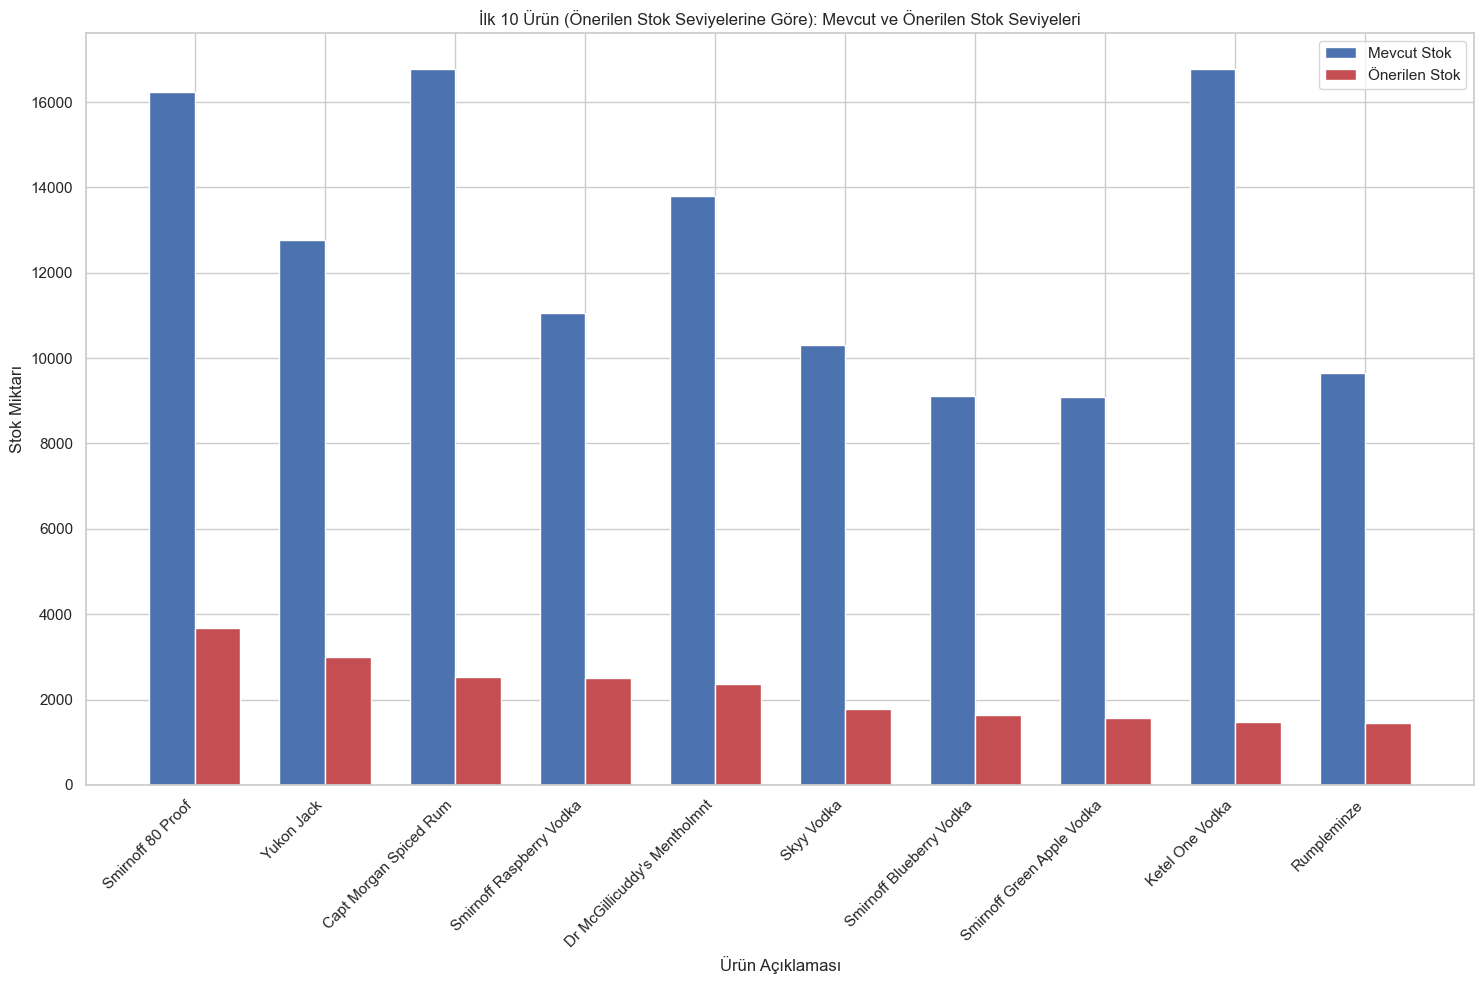

In [63]:
# Ürünleri önerilen stok seviyesine göre sıralama
sorted_data = final_data.sort_values(by='Recommended_Stock_Level', ascending=False).head(10)  # İlk 10 ürünü göstermek için

# Çift sütunlu çubuk grafik oluşturma
bar_width = 0.35  # Çubuk genişliği
index = np.arange(len(sorted_data))  # X ekseni pozisyonları

plt.figure(figsize=(15, 10))
bar1 = plt.bar(index, sorted_data['Current_Stock'], bar_width, label='Mevcut Stok', color='b')
bar2 = plt.bar([i + bar_width for i in index], sorted_data['Recommended_Stock_Level'], bar_width, label='Önerilen Stok', color='r')

# Etiketler ve başlık ayarlama
plt.xlabel('Ürün Açıklaması')
plt.ylabel('Stok Miktarı')
plt.title('İlk 10 Ürün (Önerilen Stok Seviyelerine Göre): Mevcut ve Önerilen Stok Seviyeleri')
plt.xticks([i + bar_width / 2 for i in index], sorted_data['Description'], rotation=45, ha='right')
plt.legend()

# Grafiği gösterme
plt.tight_layout()
plt.show()


Bu envanter incelemesi, önerilen stok seviyelerine göre mevcut stok seviyelerinde önemli bir fazla olduğunu vurgulamaktadır. Özellikle, "Ketel One Vodka" ve "Rumpleminze" ürünleri, önerilen envanterin oldukça üzerinde bir fazlalık sergileyerek stok yönetimindeki verimsizlikleri işaret etmektedir. İncelenen tüm ürünlerde önerilen seviyelerin üzerinde stok miktarlarının bulunması, taşıma maliyetlerinin artmasına ve stokların eskimesi riskine yol açabilir. Aşırı stok birikimini ve stok devir hızını optimize etmek için, satın alma siparişlerinin gözden geçirilmesi ve satış projeksiyonlarıyla uyum sağlanması gibi acil önlemler alınması önerilmektedir.

##### --- En Yüksek Sipariş Miktarına Göre İlk 10 Ürün: Mevcut vs Önerilen Stok Seviyeleri ---

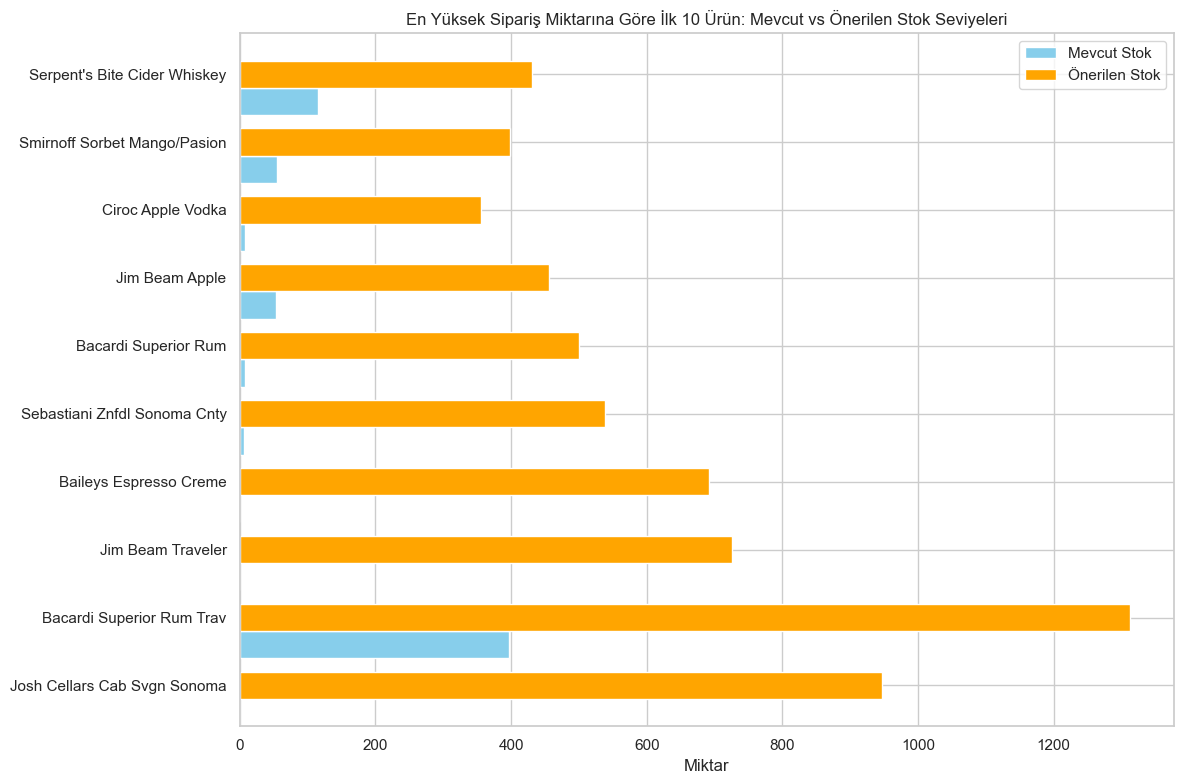

In [64]:
# Verileri, sipariş miktarının en yüksek olduğu ilk 10 ürünü gösterecek şekilde filtreliyoruz
top_products_to_order = final_data.nlargest(10, 'Order_Quantity')

# Bar grafiklerini çiziyoruz
fig, ax = plt.subplots(figsize=(12, 8))

# Barlar için indeksleme
ind = np.arange(len(top_products_to_order))

# Bar genişliği
bar_width = 0.4

# Mevcut stok ve önerilen stokları yan yana çiziyoruz
ax.barh(ind, top_products_to_order['Current_Stock'], bar_width, color='skyblue', label='Mevcut Stok')
ax.barh([i + bar_width for i in ind], top_products_to_order['Recommended_Stock_Level'], bar_width, color='orange', label='Önerilen Stok')

# Y ekseni etiketlerini ürün açıklamalarıyla ayarlıyoruz
ax.set(yticks=[i + bar_width for i in ind], yticklabels=top_products_to_order['Description'], ylim=[2 * bar_width - 1, len(ind)])

# Legendi ekliyoruz
ax.legend()

# Etiketler ve başlık ekliyoruz
ax.set_xlabel('Miktar')
ax.set_title('En Yüksek Sipariş Miktarına Göre İlk 10 Ürün: Mevcut vs Önerilen Stok Seviyeleri')

# Grafiği gösteriyoruz
plt.tight_layout()
plt.show()


En çok satan 10 ürünün tamamında mevcut stokların (mavi) önerilen stok seviyelerinin (turuncu) altında olduğunu göstermektedir. Bu durum, bu ürünlerin, önerilen envanteri karşılamak için yeniden stoklanması gerektiğini ve stok tükenmesi riskinin önlenmesi gerektiğini göstermektedir.

### Sonuç

**En Popüler Ürünler ve Trendler:**

* "Ketel One Vodka", talepteki artışa işaret ederek 4. sıradan zirveye yükseldi.

* "Capt Morgan Spiced Rum", sadece bir birim farkla 2. sırada tamamladı.

* "Smirnoff 80 Proof", yeniden markalandırmaya rağmen sırasını korudu ve 3876'dan 8111'e sıçradı.

* "Absolut 80 Proof" sıralamada biraz geriledi ancak hala güçlü.

* Yeni katılımcı "Jack Daniels No 7 Black" ilk 5'e girmeyi başardı.

**Envanter Zorlukları:**

* Yılın başında ve sonunda sıfır envanter olması, stoklama veya talep sorunlarına işaret ediyor.

* Düşük stok seviyelerine sahip ürünler, öngörülemeyen envanter seviyelerini gösteriyor.

* Seçili şaraplar gibi özel ürünler, niş talep olduğunu göstererek listenin sonunda yer alıyor.

**Envanter Yönetimi İçgörüleri:**

* En popüler ürünlerdeki güçlü tutarlılık, sağlam talep tahminleri ve yenileme süreçlerini yansıtıyor.

* Tekrarlanan sıfır stok seviyeleri, derinlemesine envanter tedarik hatalarına işaret edebilir.

* Satışlar özellikle 25 Ocak'ta zirve yaptı, ardından Şubat'ta stabilleşti.

* DIAGEO NORTH AMERICA INC, 3.9 milyon dolarlık satın alımla tedarikçi harcamalarını büyük ölçüde domine etti.

* Ortalama tedarik süresi 7.62 gündür ancak ortalama ödeme süresi 35.66 gündür.

**Operasyonel Veriler:**

* Günlük satış verileri ile Max_Daily_Sales verilerini hizalamak için 555 ürün üzerinde veri düzeltmeleri yapıldı.

* "Smirnoff 80 Proof" önerilen stok seviyeleri sıralamasında ilk sırada yer aldı.

* Çoğu ürünün güvenlik stoğu çok düşük, bu da sıkı envanter kontrolünü gösteriyor.

* Tedarik süreleri ortalama 8 gün civarında zirve yapıyor.

* Günlük satış hızı, "Smirnoff 80 Proof" için çok yüksek, bu da yüksek talebini vurguluyor.

**Stoklama Stratejileri:**

* "Josh Cellars Cab Svgn Sonoma", en fazla yeniden stoklanması gereken ürün, yaklaşık 800 birim.

* En yüksek önerilen stok seviyelerine sahip ilk on ürün için, mevcut stok seviyeleri hala önerilen seviyelerin üzerinde, bu da aşırı stoklamaya ve envanter düzenlemesi ihtiyacına işaret ediyor.

* En çok sipariş edilen 10 ürünün envanterinin, önerilen stok seviyelerine ulaşacak şekilde yenilenmesi gerekmektedir, böylece talep karşılanabilir.

Özetle, en çok satan içkiler, güçlü piyasa talebini ve etkin envanter dönüşlerini gösteriyor, sıfır stoklu ürünler ve niş ürünler ise envanter optimizasyonu fırsatları sunuyor. Ocak sonlarındaki önemli bir satış etkinliği yaşandı ve tedarikçilere ödemeler gözden geçirilmelidir. Envanter tutarsızlıkları gideriliyor ve "Smirnoff 80 Proof" gibi yüksek hızdaki ürünlere odaklanılmaktadır. Strateji, fazla envanter ve ilişkili maliyetlerden kaçınmak için yeniden stoklama süreçlerini iyileştirmeyi içeriyor.




